<a href="https://colab.research.google.com/github/Mastermind305/TOMATO-LEAF-DISEASE-CLASSIFICATION-BY-DEEP-LEARNING/blob/main/sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unrar x '/content/drive/MyDrive/tomato/train.rar'
!unrar x '/content/drive/MyDrive/tomato/val.rar'

Streaming output truncated to the last 5000 lines.
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1001f133-ff3e-48de-b288-5a3802d9f3e1___Com.G_SpM_FL 8621.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1030a8ae-d4f2-4a36-aac9-c5ca40e5ec03___Com.G_SpM_FL 9295.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/105833d3-690a-44fa-abd7-0a8c6245f7b0___Com.G_SpM_FL 1277.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/10742761-050e-4a3b-b3ef-cbbde8cd6d2a___Com.G_SpM_FL 8445.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1075cc73-3ea9-47c1-a92d-98cda4b222b7___Com.G_SpM_FL 9467.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/11337458-8442-4322-b615-31a57e7a8323___Com.G_SpM_FL 8840.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mi

In [4]:
import os
train_path = '/content/train'
test_path = '/content/val'
for dirname, _, filenames in os.walk(train_path):
    print(dirname)

/content/train
/content/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/train/Tomato___Early_blight
/content/train/Tomato___Target_Spot
/content/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/train/Tomato___Bacterial_spot
/content/train/Tomato___Tomato_mosaic_virus
/content/train/Tomato___Septoria_leaf_spot
/content/train/Tomato___healthy
/content/train/Tomato___Leaf_Mold
/content/train/Tomato___Late_blight


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 10000 images belonging to 10 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
        '/content/val',
        target_size=(150, 150),
        batch_size=8,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [7]:
# Third model

cnn3 = tf.keras.models.Sequential()

#Convolution layer 1
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=1, strides=1))

#Convolution layer 2
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=1, strides=1))

# Flattening
cnn3.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn3.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn3.summary()

# Fit
temp = cnn3.fit(x = train_generator, validation_data=test_generator,steps_per_epoch=125,validation_steps=125, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 146, 146, 32)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 682112)            0         
                                                                 
 dense (Dense)               (None, 128)               8

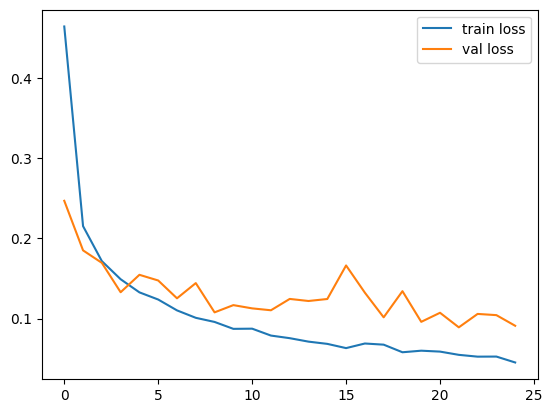

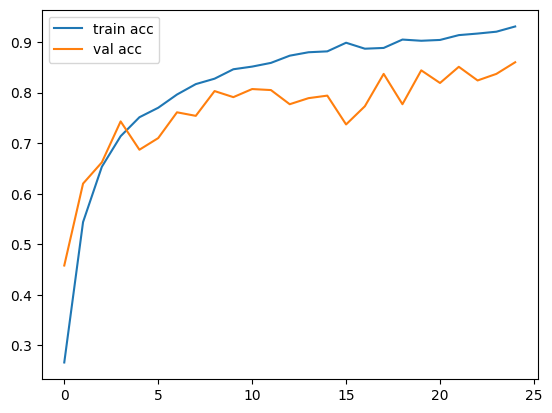

<Figure size 640x480 with 0 Axes>

In [8]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal3_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal3_acc')

In [9]:
cnn3.save('sequential_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
